In [1]:
import json
import csv
import pandas as pd
from collections import defaultdict
from glob import glob
from os import path

In [14]:
 with open('demographics_survey_fmri_followup_DV.json') as f:
        demodata = json.load(f)

In [15]:
df = pd.DataFrame.from_dict(demodata)

# df = df.drop('06acef2f-9e16-4a16-ac87-9e032feaa6dd', axis=0)

# mini_df = df.loc[:, ['age', 'sex']]

# mini_df.index.name = 'index'


,BMI,age,arrest_count,caffeine_intake,car_debt,children_count,credit_card_debt,divoce_count,education,education_debt,...,other_sources_of_debt,percent_retirement_in_stock,race,relationship_count,relationship_status,retirement_account?,sex,traffic_accident_count,traffic_ticket_count,weight(pounds)
s130,12.754086,29,1,150.0,1.0,1,1.0,0,4,3.0,...,NaN,15.0,"[ Filipino, Korean, White, American Indian or...",1,Single,Yes,Female,4,1,72
s192,28.889081,19,1,180.0,1.0,1,1.0,0,3,4.0,...,NaN,NaN,"[White, Black or African American]",1,Single,No,Female,1,2,190
s251,18.967940,19,1,0.0,NaN,1,NaN,0,3,1.0,...,NaN,NaN,"[ Black or African American, Asian Indian]",1,Single,No,Female,2,1,136
s358,20.725390,26,1,300.0,3.0,1,2.0,0,4,5.0,...,1.0,10.0,[White],4,In Committed Relationship,Yes,Female,1,1,117
s373,27.057208,32,1,340.0,4.0,1,6.0,0,5,6.0,...,NaN,NaN,[White],5,In Committed Relationship,Yes,Female,2,1,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s646,21.590787,22,1,200.0,2.0,1,1.0,0,2,3.0,...,NaN,NaN,"[ Vietnamese, Asian Indian]",1,Single,No,Male,2,1,142
s647,19.370269,24,1,40.0,4.0,1,2.0,0,4,5.0,...,NaN,3.0,[White],4,Single,Yes,Female,4,1,135
s648,21.632892,30,1,100.0,1.0,1,3.0,0,6,4.0,...,NaN,NaN,[White],6,In Committed Relationship,No,Female,4,1,130
s649,29.052438,22,1,180.0,1.0,1,1.0,0,3,1.0,...,NaN,NaN,[ Middle Eastern or North African],1,Single,No,Female,1,1,180


In [6]:
mini_df.to_csv('aim1_demographics.csv')

In [5]:
df

,BMI,age,arrest_count,caffeine_intake,car_debt,children_count,credit_card_debt,divoce_count,education,education_debt,...,other_sources_of_debt,percent_retirement_in_stock,race,relationship_count,relationship_status,retirement_account?,sex,traffic_accident_count,traffic_ticket_count,weight(pounds)
index,,,,,,,,,,,,,,,,,,,,,
s130,12.754086,29,1,150.0,1.0,1,1.0,0,4,3.0,...,NaN,15.0,"[ Filipino, Korean, White, American Indian or...",1,Single,Yes,Female,4,1,72
s192,28.889081,19,1,180.0,1.0,1,1.0,0,3,4.0,...,NaN,NaN,"[White, Black or African American]",1,Single,No,Female,1,2,190
s251,18.967940,19,1,0.0,NaN,1,NaN,0,3,1.0,...,NaN,NaN,"[ Black or African American, Asian Indian]",1,Single,No,Female,2,1,136
s358,20.725390,26,1,300.0,3.0,1,2.0,0,4,5.0,...,1.0,10.0,[White],4,In Committed Relationship,Yes,Female,1,1,117
s373,27.057208,32,1,340.0,4.0,1,6.0,0,5,6.0,...,NaN,NaN,[White],5,In Committed Relationship,Yes,Female,2,1,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s646,21.590787,22,1,200.0,2.0,1,1.0,0,2,3.0,...,NaN,NaN,"[ Vietnamese, Asian Indian]",1,Single,No,Male,2,1,142
s647,19.370269,24,1,40.0,4.0,1,2.0,0,4,5.0,...,NaN,3.0,[White],4,Single,Yes,Female,4,1,135
s648,21.632892,30,1,100.0,1.0,1,3.0,0,6,4.0,...,NaN,NaN,[White],6,In Committed Relationship,No,Female,4,1,130


In [2]:
from glob import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
battery_files = glob('fmri_battery_outputs/*')

In [4]:
task_titles = []
num_participants = []
for file in battery_files:
    with open(file) as f:
        batdata = json.load(f)
    df = pd.DataFrame.from_dict(batdata)
    savable_rows = [True if len(idx)==4 else False for idx in df.index] #make sure you are grabbing only subjects who participated in the fmri portion
    df = df[savable_rows]
    task_name = re.sub('_survey', '', re.sub(r'_fmri_followup_DV.json','', file.split('/')[1]))
    npars = len(df)
    task_titles.append(task_name)
    num_participants.append(npars)
    print(task_name, npars)

leisure_time_activity 85
tower_of_london 84
self_regulation 83
kirby 81
shift_task 76
dickman 81
stim_selective_stop_signal 67
ten_item_personality 79
time_perspective 81
choice_reaction_time 82
hierarchical_rule 85
attention_network_task 81
selection_optimization_compensation 82
two_stage_decision 62
mindful_attention_awareness 86
angling_risk_task_always_sunny 76
directed_forgetting 82
shape_matching 79
go_nogo 78
holt_laury 88
bis_bas 83
columbia_card_task_hot 82
eating 85
cognitive_reflection 84
ravens 83
writing_task 84
dospert_rp 83
impulsive_venture 84
psychological_refractory_period_two_choices 81
grit_scale 90
simon 80
stroop 81
stop_signal 67
demographics 97
motor_selective_stop_signal 54
recent_probes 77
dietary_decision 80
probabilistic_selection 47
digit_span 81
simple_reaction_time 78
erq 84
upps_impulsivity 83
dospert_eb 87
mpq_control 86
theories_of_willpower 81
bickel_titrator 81
bis11 87
adaptive_n_back 80
dot_pattern_expectancy 80
columbia_card_task_cold 83
five_face

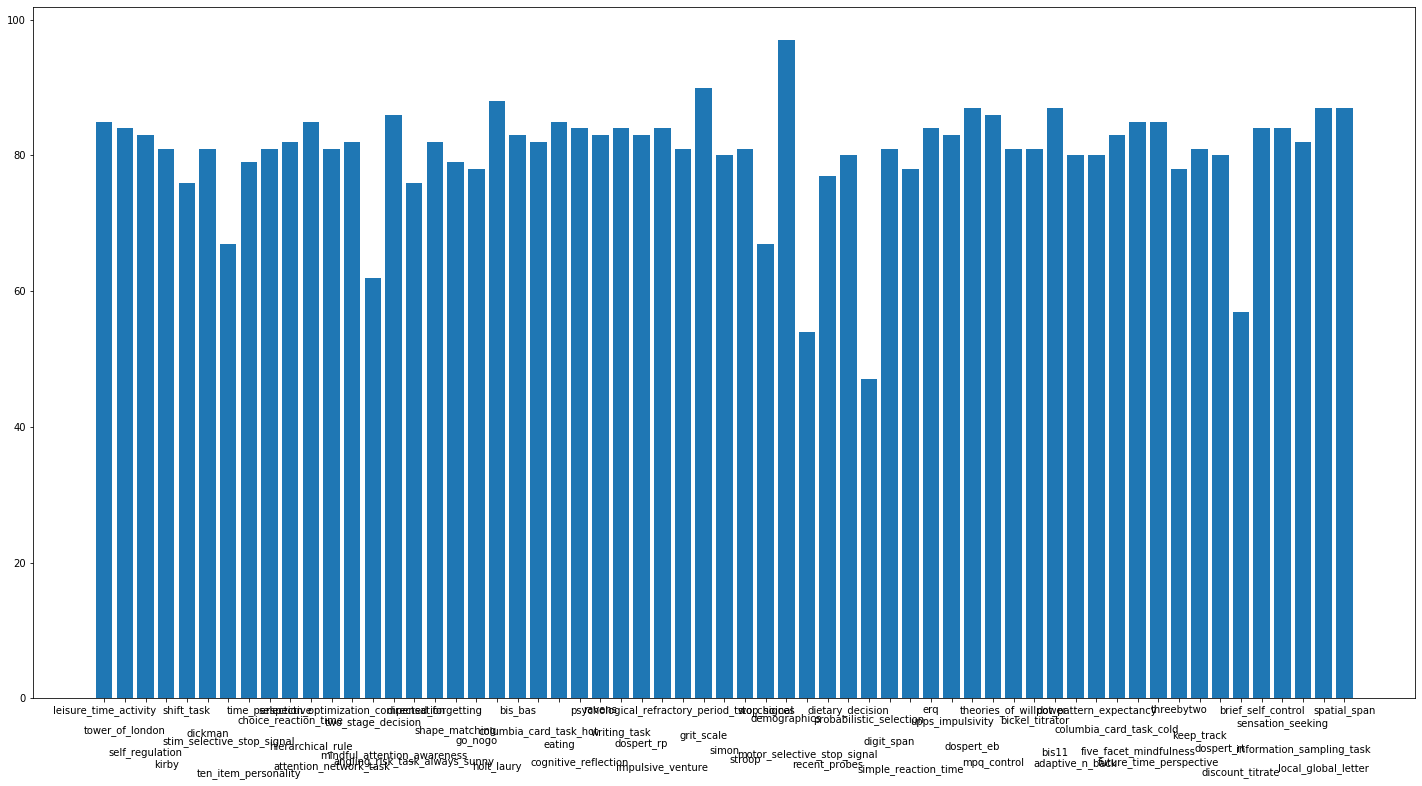

In [5]:
fig = plt.figure(figsize=(24,12))
axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.bar(task_titles, num_participants)

for tick in axes.xaxis.get_major_ticks()[1::4]:
    tick.set_pad(20 + np.random.randint(-8,9))
    
for tick in axes.xaxis.get_major_ticks()[2::4]:
    tick.set_pad(40 + np.random.randint(-8,9))

for tick in axes.xaxis.get_major_ticks()[3::4]:
    tick.set_pad(60 + np.random.randint(-8,9))  

In [28]:
file

'fmri_battery_outputs/spatial_span_fmri_followup_DV.json'

In [33]:
len(df)

98

In [59]:
task_titles[num_participants==47]

'leisure_time_activity'